## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# # 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
## 超參數設定
LEARNING_RATE = 3e-2
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = (0.75, 0.95)
NESTEROV = (True, False)

In [12]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for momentum in MOMENTUM:
    for nesterov in NESTEROV:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print(f"momentum:{momentum}, nesterov:{nesterov}")
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nesterov, momentum=momentum)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = f"{momentum}-{nesterov}"
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


momentum:0.75, nesterov:True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.8893 - acc: 0.3194 - val_loss: 1.7299 - val_acc: 0.3849
Epoch 2/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.6869 - acc: 0.3983 - val_loss: 1.6652 - val_acc: 0.4030
Epoch 3/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.6045 - acc: 0.4277 - val_loss: 1.5969 - val_acc: 0.4236
Epoch 4/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.5413 - acc: 0.4512 - val_loss: 1.5232 - val_acc: 0.4608
Epoch 5/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.4905 - acc: 0.4704 - val_loss: 1.5135 - val_acc: 0.4583
Epoch 6/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.4563 - acc: 0.4815 - val_loss: 1.4664 - val_acc: 0.4820
Epoch 7/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.4269 - acc: 0.4929 - val_loss: 1.5134 - val_acc

50000/50000 [==============================] - 3s 58us/step - loss: 1.6087 - acc: 0.4253 - val_loss: 1.6777 - val_acc: 0.4038
Epoch 3/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.5266 - acc: 0.4553 - val_loss: 1.6274 - val_acc: 0.4184
Epoch 4/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.4712 - acc: 0.4726 - val_loss: 1.5597 - val_acc: 0.4483
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.4186 - acc: 0.4921 - val_loss: 1.5144 - val_acc: 0.4628
Epoch 6/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.3850 - acc: 0.5057 - val_loss: 1.5482 - val_acc: 0.4490
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.3434 - acc: 0.5196 - val_loss: 1.4581 - val_acc: 0.4887
Epoch 8/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.3060 - acc: 0.5331 - val_loss: 1.4364 - val_acc: 0.4995
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.6187 - acc: 0.4155 - val_loss: 1.6046 - val_acc: 0.4264
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.5537 - acc: 0.4433 - val_loss: 1.6017 - val_acc: 0.4155
Epoch 6/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.5394 - acc: 0.4469 - val_loss: 1.5577 - val_acc: 0.4391
Epoch 7/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.4980 - acc: 0.4581 - val_loss: 1.5255 - val_acc: 0.4518
Epoch 8/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.4851 - acc: 0.4669 - val_loss: 1.5455 - val_acc: 0.4481
Epoch 9/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.4649 - acc: 0.4734 - val_loss: 1.5191 - val_acc: 0.4626
Epoch 10/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.4365 - acc: 0.4838 - val_loss: 1.4850 - val_acc: 0.4725
Epoch 11/50
50000/50000 [===============

In [27]:
a = list(results.keys())[2:]

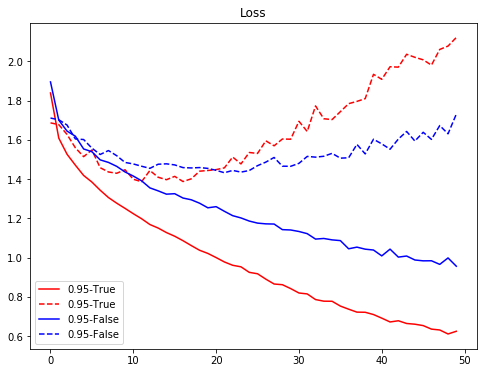

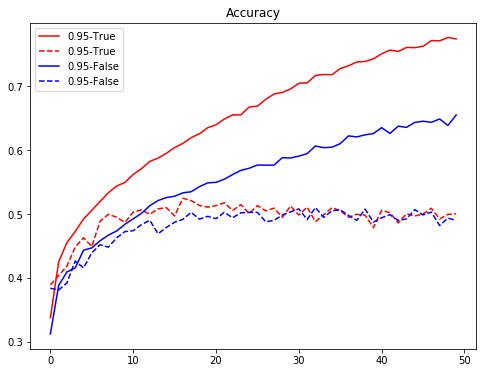

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "b", "y", "m", "g", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(a):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(a):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()